In [2]:
import pandas as pd

DATA_PATH = 'data/churn_data.xlsx'

df = pd.read_excel(DATA_PATH)
df.head(4)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No


In [3]:
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [5]:
cat_vars = ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod']
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
mod_vars = cat_vars + num_vars

In [6]:
X = df.filter(mod_vars).copy()
y = pd.DataFrame(df['Churn'].copy())

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y['Churn']            =  le.fit_transform(y['Churn'])
X['Contract']         =  le.fit_transform(X['Contract'])
X['PhoneService']     =  le.fit_transform(X['PhoneService'])
X['PaymentMethod']    =  le.fit_transform(X['PaymentMethod'])
X['PaperlessBilling'] =  le.fit_transform(X['PaperlessBilling'])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
lr.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [11]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,PhoneService,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,churn,label
2407,1,0,1,2,2,70.70,141.45,1,1
1406,1,2,1,1,66,25.30,1673.80,0,0
6280,1,1,1,2,23,49.45,1119.35,0,0
4153,1,1,0,3,27,20.30,595.05,0,0
737,1,2,0,1,70,101.00,7085.50,0,0
...,...,...,...,...,...,...,...,...,...
264,1,1,0,3,45,113.30,5032.25,0,0
2521,1,0,1,1,36,85.25,3132.75,1,0
2150,1,0,1,2,21,84.10,1737.45,0,1
2132,1,1,0,3,23,19.65,436.90,0,0


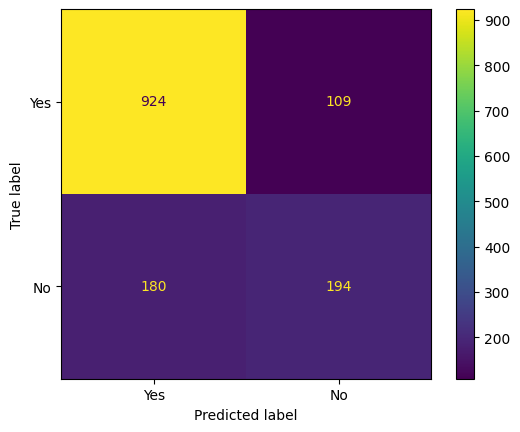

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, lr.predict(X_test)), display_labels=['Yes', 'No'])
cmd.plot()

In [26]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f'LR Train Accuracy -> {(accuracy_score(y_train, lr.predict(X_train)) * 100).round(2)}%')
print(f'LR Test  Accuracy -> {(accuracy_score(y_test, lr.predict(X_test)) * 100).round(2)}%')
print(f'LR Train Balanced Accuracy -> {(balanced_accuracy_score(y_train, lr.predict(X_train)) * 100).round(2)}%')
print(f'LR Test  Balanced Accuracy -> {(balanced_accuracy_score(y_test, lr.predict(X_test)) * 100).round(2)}%')
print(f'LR Train Precision Score -> {(precision_score(y_train, lr.predict(X_train)) * 100).round(2)}%')
print(f'LR Test  Precision Score -> {(precision_score(y_test, lr.predict(X_test)) * 100).round(2)}%')
print(f'LR Train Recall Score -> {(recall_score(y_train, lr.predict(X_train)) * 100).round(2)}%')
print(f'LR Test  Recall Score -> {(recall_score(y_test, lr.predict(X_test)) * 100).round(2)}%')
print(f'LR Train F1 Score -> {(f1_score(y_train, lr.predict(X_train)) * 100).round(2)}%')
print(f'LR Test  F1 Score -> {(f1_score(y_test, lr.predict(X_test)) * 100).round(2)}%')
print(f'LR Train Roc Auc Score -> {(roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]) * 100).round(2)}%')
print(f'LR Test  Roc Auc Score -> {(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]) * 100).round(2)}%')

LR Train Accuracy -> 79.68%
LR Test  Accuracy -> 79.46%
LR Train Balanced Accuracy -> 71.22%
LR Test  Balanced Accuracy -> 70.66%
LR Train Precision Score -> 64.22%
LR Test  Precision Score -> 64.03%
LR Train Recall Score -> 53.18%
LR Test  Recall Score -> 51.87%
LR Train F1 Score -> 58.18%
LR Test  F1 Score -> 57.31%
LR Train Roc Auc Score -> 83.37%
LR Test  Roc Auc Score -> 84.71%


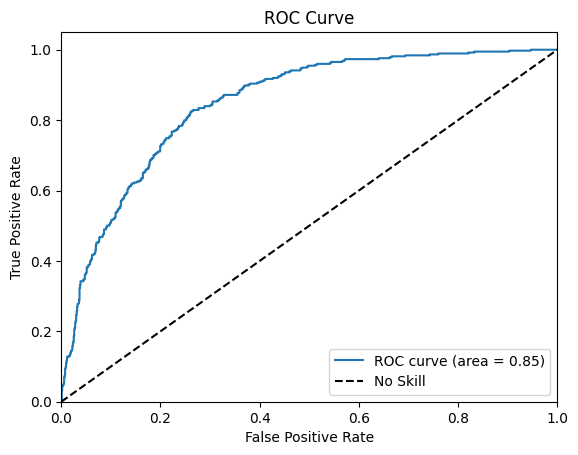

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [43]:
metrics = {
  'model': ['Logistic Regression','Logistic Regression'],
  'type' : ['train', 'test'],
  'accuracy': [(accuracy_score(y_train, lr.predict(X_train))).round(2), (accuracy_score(y_test, lr.predict(X_test))).round(2)],
  'balanced_accuracy': [(balanced_accuracy_score(y_train, lr.predict(X_train))).round(2), (balanced_accuracy_score(y_test, lr.predict(X_test))).round(2)],
  'f1_score': [(f1_score(y_train, lr.predict(X_train))).round(2), (f1_score(y_test, lr.predict(X_test))).round(2)]
}

pd.DataFrame(metrics)

,model,type,accuracy,balanced_accuracy,f1_score
0,Logistic Regression,train,0.80,0.71,0.58
1,Logistic Regression,test,0.79,0.71,0.57
